In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [163]:
ec= pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\Global Economy.csv")

In [164]:
#ec['GDP_Growth_Percentage']=ec['GDP_Growth_Percentage'].fillna(0)

In [165]:
ec.head(2)

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,869917407.0,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,910828104.0,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09


In [166]:
ec[' Country '].unique()

array([' Afghanistan ', ' Albania ', ' Algeria ', ' Azerbaijan ',
       ' Argentina ', ' Australia ', ' Bahrain ', ' Bangladesh ',
       ' Armenia ', ' Barbados ', ' Belgium ', ' Bhutan ', ' Myanmar ',
       ' Burundi ', ' Belarus ', ' Canada ', ' Central African Republic ',
       ' Sri Lanka ', ' Chad ', ' Chile ', ' China ', ' Colombia ',
       ' Congo ', ' D.R. of the Congo ', ' Cuba ', ' Cyprus ',
       ' Denmark ', ' Ecuador ', ' Ethiopia ', ' Eritrea ', ' Finland ',
       ' France ', ' Djibouti ', ' State of Palestine ', ' Germany ',
       ' Ghana ', ' Greece ', ' Guyana ', ' Haiti ', ' Hungary ',
       ' India ', ' Indonesia ', ' Iran (Islamic Republic of) ', ' Iraq ',
       ' Ireland ', ' Israel ', ' Italy ', ' Japan ', ' Kazakhstan ',
       ' Jordan ', ' Kenya ', ' D.P.R. of Korea ', ' Republic of Korea ',
       ' Kuwait ', ' Lebanon ', ' Libya ', ' Madagascar ', ' Malaysia ',
       ' Maldives ', ' Mali ', ' Malta ', ' Oman ', ' Namibia ',
       ' Nepal ', ' New 

In [167]:
country_data= ec[ec[' Country ']== ' Australia '].copy()

In [168]:
country_data

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
240,36,Australia,1970,0.892857,0.892857,12595034,Australian Dollar,3551,2.600883e+09,6.574401e+08,...,2.461424e+10,5.839681e+09,9.465868e+09,1.226765e+10,1.358197e+10,4.001644e+10,3.464878e+09,4.581767e+09,4.471937e+10,4.521665e+10
241,36,Australia,1971,0.882670,0.882670,12993834,Australian Dollar,3867,2.984188e+09,1.790023e+08,...,2.754709e+10,6.032830e+09,1.036780e+10,1.367062e+10,1.573177e+10,4.545721e+10,3.935171e+09,5.147036e+09,5.025319e+10,5.046958e+10
242,36,Australia,1972,0.838698,0.838698,13300308,Australian Dollar,4469,4.280596e+09,-4.053904e+08,...,3.232869e+10,6.535131e+09,1.199495e+10,1.593572e+10,1.918699e+10,5.475459e+10,4.565003e+09,6.091943e+09,5.943857e+10,5.940280e+10
243,36,Australia,1973,0.703497,0.703497,13513318,Australian Dollar,6328,6.952640e+09,1.791052e+09,...,4.591064e+10,1.132059e+10,1.664434e+10,2.221916e+10,2.750603e+10,7.828425e+10,6.298830e+09,8.790871e+09,8.550710e+10,8.580277e+10
244,36,Australia,1974,0.696666,0.696666,13713388,Australian Dollar,7474,6.145262e+09,9.803839e+08,...,5.714935e+10,1.504739e+10,1.965978e+10,2.667909e+10,3.541480e+10,9.529345e+10,7.721896e+09,1.087096e+10,1.030000e+11,1.020000e+11
245,36,Australia,1975,0.763871,0.763871,13886854,Australian Dollar,7857,5.757129e+09,2.356418e+08,...,6.086628e+10,1.457968e+10,2.048211e+10,2.890945e+10,3.902834e+10,1.030000e+11,8.432919e+09,1.164682e+10,1.090000e+11,1.090000e+11
246,36,Australia,1976,0.818284,0.818284,14038072,Australian Dollar,8316,5.989903e+09,1.385827e+09,...,6.665534e+10,1.720063e+10,2.152179e+10,3.075131e+10,4.219842e+10,1.100000e+11,8.958076e+09,1.229958e+10,1.170000e+11,1.180000e+11
247,36,Australia,1977,0.901825,0.901825,14193365,Australian Dollar,8109,5.321031e+09,-5.854794e+08,...,6.737006e+10,1.697447e+10,2.096772e+10,3.036188e+10,4.262839e+10,1.080000e+11,8.744391e+09,1.197415e+10,1.150000e+11,1.160000e+11
248,36,Australia,1978,0.873659,0.873659,14355814,Australian Dollar,9353,8.780798e+09,1.588720e+09,...,7.699684e+10,2.084451e+10,2.359707e+10,3.526145e+10,4.951209e+10,1.280000e+11,1.006217e+10,1.352514e+10,1.340000e+11,1.360000e+11
249,36,Australia,1979,0.894641,0.894641,14520527,Australian Dollar,10254,9.886120e+09,1.021639e+09,...,8.412314e+10,2.390345e+10,2.609444e+10,4.008788e+10,5.506467e+10,1.420000e+11,1.156107e+10,1.414469e+10,1.490000e+11,1.500000e+11


In [169]:
ec.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
0,4,Afghanistan,1970,0.044998,0.044998,10752971,Afghani,164,8.699174e+08,NaN,...,1.551094e+09,195277226.0,370146827.0,376690811.0,127747843.0,1.731454e+09,83917200.0,226387091.0,1.766528e+09,1.731436e+09
1,4,Afghanistan,1971,0.044998,0.044998,11015857,Afghani,168,9.108281e+08,NaN,...,1.675426e+09,276296480.0,387549502.0,394401164.0,133754097.0,1.812857e+09,87860382.0,237019196.0,1.850122e+09,1.812838e+09
2,4,Afghanistan,1972,0.044998,0.044998,11286753,Afghani,149,8.279453e+08,NaN,...,1.498812e+09,290370350.0,352284669.0,358512865.0,121582672.0,1.647918e+09,79864525.0,215477287.0,1.683948e+09,1.647900e+09
3,4,Afghanistan,1973,0.044998,0.044998,11575305,Afghani,150,8.554869e+08,NaN,...,1.508024e+09,262962880.0,364010279.0,370445793.0,125630236.0,1.702735e+09,82528885.0,222624293.0,1.739998e+09,1.702716e+09
4,4,Afghanistan,1974,0.044998,0.044998,11869879,Afghani,177,1.035913e+09,NaN,...,1.778819e+09,305679151.0,440760406.0,448552790.0,152119162.0,2.061752e+09,99918604.0,269525910.0,2.106420e+09,2.061729e+09


In [170]:
country_data.isnull().sum()

CountryID                                                                                    0
Country                                                                                      0
Year                                                                                         0
AMA exchange rate                                                                            0
IMF based exchange rate                                                                      0
Population                                                                                   0
Currency                                                                                     0
Per capita GNI                                                                               0
Agriculture, hunting, forestry, fishing (ISIC A-B)                                           0
Changes in inventories                                                                       0
Construction (ISIC F)                             

In [171]:
ec.columns

Index([' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National In

In [172]:
country_data.head()

,CountryID,Country,Year,AMA exchange rate,IMF based exchange rate,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
240,36,Australia,1970,0.892857,0.892857,12595034,Australian Dollar,3551,2.600883e+09,6.574401e+08,...,2.461424e+10,5.839681e+09,9.465868e+09,1.226765e+10,1.358197e+10,4.001644e+10,3.464878e+09,4.581767e+09,4.471937e+10,4.521665e+10
241,36,Australia,1971,0.882670,0.882670,12993834,Australian Dollar,3867,2.984188e+09,1.790023e+08,...,2.754709e+10,6.032830e+09,1.036780e+10,1.367062e+10,1.573177e+10,4.545721e+10,3.935171e+09,5.147036e+09,5.025319e+10,5.046958e+10
242,36,Australia,1972,0.838698,0.838698,13300308,Australian Dollar,4469,4.280596e+09,-4.053904e+08,...,3.232869e+10,6.535131e+09,1.199495e+10,1.593572e+10,1.918699e+10,5.475459e+10,4.565003e+09,6.091943e+09,5.943857e+10,5.940280e+10
243,36,Australia,1973,0.703497,0.703497,13513318,Australian Dollar,6328,6.952640e+09,1.791052e+09,...,4.591064e+10,1.132059e+10,1.664434e+10,2.221916e+10,2.750603e+10,7.828425e+10,6.298830e+09,8.790871e+09,8.550710e+10,8.580277e+10
244,36,Australia,1974,0.696666,0.696666,13713388,Australian Dollar,7474,6.145262e+09,9.803839e+08,...,5.714935e+10,1.504739e+10,1.965978e+10,2.667909e+10,3.541480e+10,9.529345e+10,7.721896e+09,1.087096e+10,1.030000e+11,1.020000e+11


In [173]:
df = country_data[[' CountryID ', ' Country ', ' Year ', ' AMA exchange rate ',
       ' IMF based exchange rate ', ' Population ', ' Currency ',
       ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National Income(GNI) in USD ',
       ' Gross Domestic Product (GDP) ']].copy()

In [174]:
df.rename(columns ={' Year ': 'ds',' IMF based exchange rate ':'y'},inplace= True)

In [175]:
df.columns

Index([' CountryID ', ' Country ', 'ds', ' AMA exchange rate ', 'y',
       ' Population ', ' Currency ', ' Per capita GNI ',
       ' Agriculture, hunting, forestry, fishing (ISIC A-B) ',
       ' Changes in inventories ', ' Construction (ISIC F) ',
       ' Exports of goods and services ', ' Final consumption expenditure ',
       ' General government final consumption expenditure ',
       ' Gross capital formation ',
       ' Gross fixed capital formation (including Acquisitions less disposals of valuables) ',
       ' Household consumption expenditure (including Non-profit institutions serving households) ',
       ' Imports of goods and services ', ' Manufacturing (ISIC D) ',
       ' Mining, Manufacturing, Utilities (ISIC C-E) ',
       ' Other Activities (ISIC J-P) ', ' Total Value Added ',
       ' Transport, storage and communication (ISIC I) ',
       ' Wholesale, retail trade, restaurants and hotels (ISIC G-H) ',
       ' Gross National Income(GNI) in USD ',
       ' Gross 

In [176]:
df['ds']= pd.to_datetime(df['ds'],format = '%Y')

In [177]:
df.head()

,CountryID,Country,ds,AMA exchange rate,y,Population,Currency,Per capita GNI,"Agriculture, hunting, forestry, fishing (ISIC A-B)",Changes in inventories,...,Household consumption expenditure (including Non-profit institutions serving households),Imports of goods and services,Manufacturing (ISIC D),"Mining, Manufacturing, Utilities (ISIC C-E)",Other Activities (ISIC J-P),Total Value Added,"Transport, storage and communication (ISIC I)","Wholesale, retail trade, restaurants and hotels (ISIC G-H)",Gross National Income(GNI) in USD,Gross Domestic Product (GDP)
240,36,Australia,1970-01-01,0.892857,0.892857,12595034,Australian Dollar,3551,2.600883e+09,6.574401e+08,...,2.461424e+10,5.839681e+09,9.465868e+09,1.226765e+10,1.358197e+10,4.001644e+10,3.464878e+09,4.581767e+09,4.471937e+10,4.521665e+10
241,36,Australia,1971-01-01,0.882670,0.882670,12993834,Australian Dollar,3867,2.984188e+09,1.790023e+08,...,2.754709e+10,6.032830e+09,1.036780e+10,1.367062e+10,1.573177e+10,4.545721e+10,3.935171e+09,5.147036e+09,5.025319e+10,5.046958e+10
242,36,Australia,1972-01-01,0.838698,0.838698,13300308,Australian Dollar,4469,4.280596e+09,-4.053904e+08,...,3.232869e+10,6.535131e+09,1.199495e+10,1.593572e+10,1.918699e+10,5.475459e+10,4.565003e+09,6.091943e+09,5.943857e+10,5.940280e+10
243,36,Australia,1973-01-01,0.703497,0.703497,13513318,Australian Dollar,6328,6.952640e+09,1.791052e+09,...,4.591064e+10,1.132059e+10,1.664434e+10,2.221916e+10,2.750603e+10,7.828425e+10,6.298830e+09,8.790871e+09,8.550710e+10,8.580277e+10
244,36,Australia,1974-01-01,0.696666,0.696666,13713388,Australian Dollar,7474,6.145262e+09,9.803839e+08,...,5.714935e+10,1.504739e+10,1.965978e+10,2.667909e+10,3.541480e+10,9.529345e+10,7.721896e+09,1.087096e+10,1.030000e+11,1.020000e+11


In [178]:
model = Prophet(changepoint_prior_scale=0.5)

In [179]:
'''model.add_regressor(' Transport, storage and communication (ISIC I) ')
#model.add_regressor(' Gross National Income(GNI) in USD ')

model.add_regressor(' IMF based exchange rate ')'''

"model.add_regressor(' Transport, storage and communication (ISIC I) ')\n#model.add_regressor(' Gross National Income(GNI) in USD ')\n\nmodel.add_regressor(' IMF based exchange rate ')"

In [180]:
model.fit(df)

07:50:58 - cmdstanpy - INFO - Chain [1] start processing


07:51:00 - cmdstanpy - INFO - Chain [1] done processing


In [181]:
future = model.make_future_dataframe(periods=10,freq='YE')

In [182]:
'''last_values =df.iloc[-1]
future[' Transport, storage and communication (ISIC I) '] = last_values[' Transport, storage and communication (ISIC I) ']

#future[' Gross National Income(GNI) in USD ']=last_values[' Gross National Income(GNI) in USD ']
future[' IMF based exchange rate '] = last_values[' IMF based exchange rate ']'''

"last_values =df.iloc[-1]\nfuture[' Transport, storage and communication (ISIC I) '] = last_values[' Transport, storage and communication (ISIC I) ']\n\n#future[' Gross National Income(GNI) in USD ']=last_values[' Gross National Income(GNI) in USD ']\nfuture[' IMF based exchange rate '] = last_values[' IMF based exchange rate ']"

In [183]:
forecast = model.predict(future)

In [184]:
forecast.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01,-0.449583,0.683710,0.948587,-0.449583,-0.449583,1.260815,1.260815,1.260815,1.260815,1.260815,1.260815,0.0,0.0,0.0,0.811231
1,1971-01-01,-0.450486,0.677474,0.936944,-0.450486,-0.450486,1.250146,1.250146,1.250146,1.250146,1.250146,1.250146,0.0,0.0,0.0,0.799661


In [185]:
import seaborn as sns

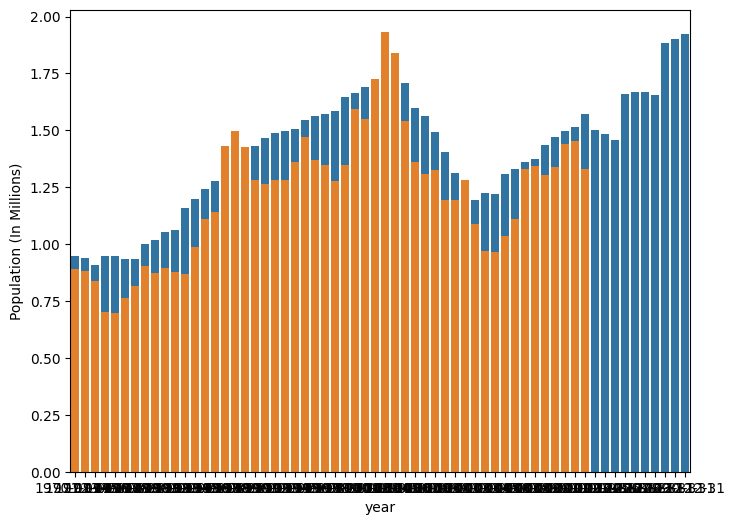

In [186]:
plt.figure(figsize=(8,6))
sns.barplot(data=forecast,x = 'ds', y = 'yhat_upper')
sns.barplot(data= df,x= df['ds'],y=df['y'])
plt.xlabel('year')
plt.ylabel('Population (In Millions)')
plt.show()

In [187]:
forecast.to_csv('Australia_IMF EXCHANGE RATE_UPPER_forecast.csv',index = False)

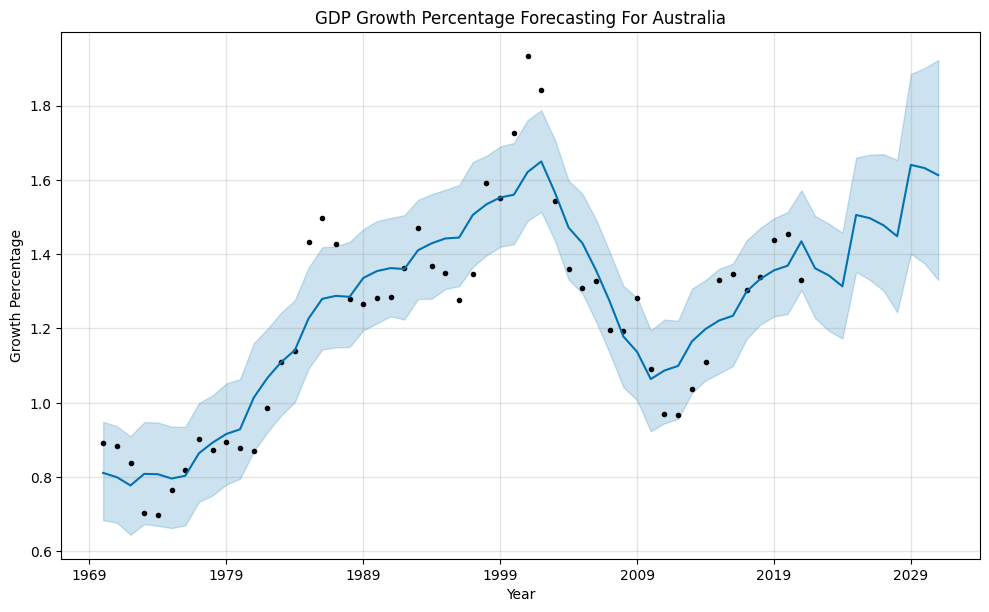

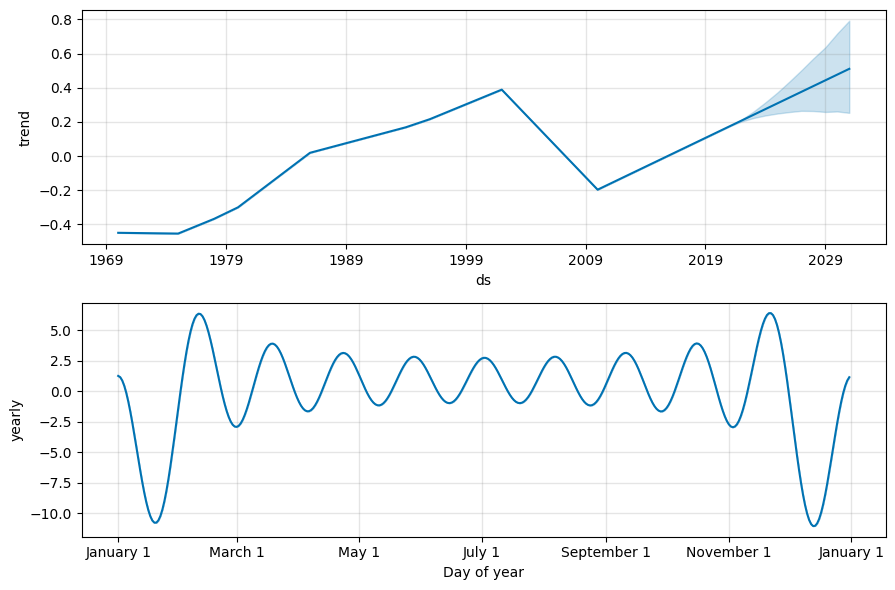

In [188]:
fig = model.plot(forecast)
plt.title('GDP Growth Percentage Forecasting For Australia')
plt.xlabel('Year')
plt.ylabel('Growth Percentage')


fig1= model.plot_components(forecast)
plt.show()

In [189]:
india_forecast=forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(15)

In [190]:
import seaborn as sns

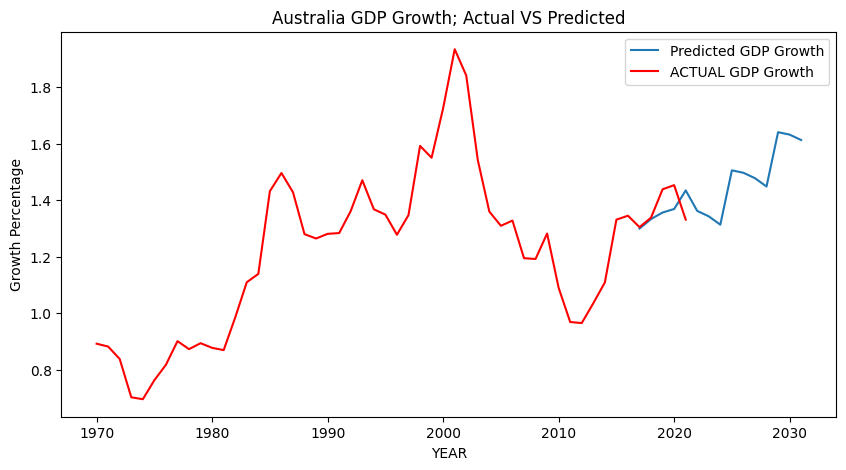

In [191]:
plt.figure(figsize=(10,5))
sns.lineplot(data=india_forecast,x='ds',y='yhat',label = 'Predicted GDP Growth')
sns.lineplot(data = df ,x=df['ds'],y=df['y'],color = 'red', label = 'ACTUAL GDP Growth')
plt.title('Australia GDP Growth; Actual VS Predicted')
plt.xlabel('YEAR')
plt.ylabel('Growth Percentage')
plt.show()